# GENDER DETECTION BASED ON VOICE

## DESCRIPTION AND BASIC IDEA

In [1]:
import pandas as pd
df = pd.read_csv('voice.csv')
print(df.head(5))

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812

In [7]:
print "SHAPE : ",
print df.shape
print "NULL VALUES : ",
print df.isnull().values.any()

SHAPE :  (3168, 21)
NULL VALUES :  False


In [3]:
print(df.describe())

          meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2

## CORRELATION 

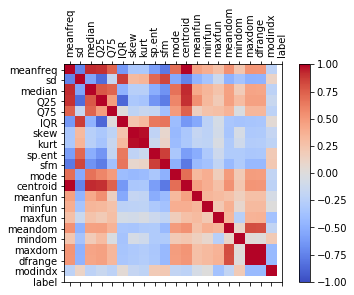

In [12]:
import matplotlib.pyplot as plt
import numpy as np
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Automatically created module for IPython interactive environment


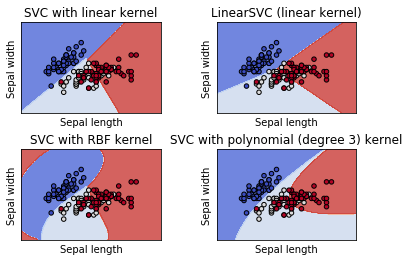

In [13]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
